In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [4]:
iris_data = iris['data']
iris_target = np.where(iris["target"]==0,1,0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_target,test_size = 0.2)

In [6]:
def weight_initial(n_features):
    weight = np.zeros((1,n_features))
    bias = 0
    return weight,bias

In [7]:
def logistic(z):
    y_hat = 1/(1 + np.exp(-z))
    return y_hat

In [8]:
def model_optimize(weight, bias, X, Y):
    m = X.shape[0]
    
    #Prediction
    y_hat = logistic(np.dot(weight,X.T) + bias)
    truth = Y.T
    cost = (-1/m)*(np.sum((truth * np.log(y_hat)) + ((1 - truth)*(np.log(1 - y_hat)))))
    
    #Gradient Descent
    delta_weight = (1/m) * (np.dot( X.T, ( y_hat - Y.T ).T))
    delta_bias = (1/m) * (np.sum( y_hat - Y.T))
    
    grads = {'delta_weight': delta_weight, 'delta_bias': delta_bias}
    
    return grads, cost

In [9]:
def model_predict(weight, bias, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range (no_iterations):
        
        grads,cost = model_optimize(weight, bias, X, Y)
        delta_weight = grads['delta_weight']
        delta_bias = grads['delta_bias']
        
        #weight update
        weight = weight - (learning_rate * delta_weight.T)
        bias = bias - (learning_rate * delta_bias)
        
        if (i % 100 == 0):
            costs.append(cost)
    #final parameters
    coeff = {"weight": weight, "bias": bias}
    gradient = {"delta_weight": delta_weight, "delta_bias": delta_bias}
    return coeff, gradient, costs

In [10]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [51]:
def accuracy_score(final_pred,Y):
    print(final_pred.shape)
    Y= Y.reshape(Y.shape[0],1)
    print(Y.shape)
    incorrect = np.sum(np.abs(final_pred-Y))
    accuracy = 1-(incorrect/  Y.shape[0])
  
    return accuracy

In [52]:
# Get the number of features
n_features = X_train.shape[1]
print('Number of Features', n_features)
weight, bias = weight_initial(n_features)

#Gradient Descent
coeff, gradient, costs = model_predict(weight, bias, X_train, y_train, learning_rate=0.001, no_iterations=5000)

#Final prediction
weight = coeff['weight']
bias = coeff['bias']

print('Optimized weights', weight)
print('Optimized intercept', bias)

final_train_pred = logistic(np.dot(weight,X_train.T)+ bias)
final_test_pred = logistic(np.dot(weight,X_test.T)+ bias)

m_train = X_train.shape[0]
m_test = X_test.shape[0]

#
y_train_pred = predict(final_train_pred, m_train)
print('Training Accuracy',accuracy_score(y_train_pred.T, y_train))
#
y_test_pred = predict(final_test_pred, m_test)
print('Test Accuracy',accuracy_score(y_test_pred.T, y_test))




Number of Features 4
Optimized weights [[ 0.18791586  0.67381488 -1.09157208 -0.50259572]]
Optimized intercept 0.12915330046796364
[[0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
  0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]]
(120, 1)
(120, 1)
Training Accuracy 1.0
(30, 1)
(30, 1)
Test Accuracy 1.0


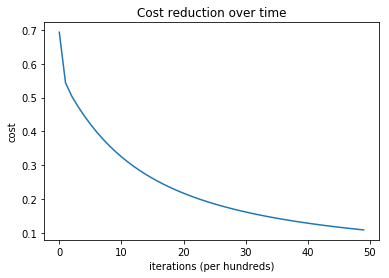

In [12]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()